#Project Name


**Amazon Prime movies and Tv shows EDA project**

#Project Type

**Exploratory Data Analysis(EDA) Project**

#Contribution

**Individual**

**by - Ayushi Jain**

#Project Summary


This exploratory Data Analysis (EDA) project focuses on understanding the content available on Amazon Prime video, one of the worlds leading streaming platforms.

1.Dataset overview the dataset is a combination of:

Credit dataset: contains details of cast and crew members assosciated with movies and Tv shows.

Title dataset: includes movies/ show metadata genre, release year, imdb score,and country of production. Merged dataset structure after merging the dataset contains the following key filed:

Title information: id,title,type,release year,genres,runtime cast and crew details name, character,role,performance. metrics: imdb_score,imdb_votes,tmdb_popularity,tmdb_score.

2.Key EDA questions to explore and understand the dataset, the following questions will be investigated:

A. General Data insights how many unique movies/shows are in the datset?What is the distribution of content types(movies vs shows)?

which year has the most releases?

B.Cast and Crew analysis who are the most frequently credited actors and directors? What are the most common roles in the dataset? which actors and directors are assosciated with the highest rated movies?

C.Genre and Runtime trends what are the most popular generes? how are runtime worry accross different genres? Are there any patterns in movie length over the years?

D.Performance and ratings what factors influence imdb scores? How are imdb and tmdb ratings are compared accross genres? Which production country contribute to the highest rated content?

3.Methodology and approach to answer these question, the foolowing method will be applied:

Data cleaning and preprocessing: Handling missing values, standardised genre formats,and dealing with null values in imdb_scores and character.

Visualization: Bar charts to compare actor/role frequency ,Histogram for runtime and imdb scores,boxplots to analyze score distribution accross genres,time series trends in release yeas correaltion analysis:Examining relationships between imdb score,tmdb score,runtime and popularity matrics.

4.Expected outcomes by the end of this EDA , we expect to:

identify the most influenctial actorsand directors in the dataset. Understand different factors impact mivie/showratings.Determine key trendsin film production and audience prefrence over time.

#Github Link



#Problem Statement


The primary business objective of this Exploratory Data Analysis (EDA) project is to uncover the insights and trends in the content available on Amazon Prime video. Amazon prime hosts a leading global streaming platform, Amazon Prime hosts a diverse collection of movies and tv shows. Understanding the structure, composition, and audience preferences assosciated with this content can offer valuable information to various stakeholders in the entertainment and digital media industry.

Specifically this project aims to:

Determine the distribution between movies and tv shows to understand content prioritization.

Identify the most common genres and how they align with viewer prefrences.

Provide insights into runtime, seasons, and other structural aspects of the content.

These insights will help the Amazon Prime optimize their content strategy, improve user engagement, and make data driven decisons about future content acquisition and production.

By defining this objective clearly, the project sets a focused direction for the data analysis and ensures taht the insights derived are relevant, actionable, and aligned with business goals.

#Lets Begin!

#1.Know your Data

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
from google.colab import files
uploaded = files.upload()

Saving credits.csv.zip to credits.csv (1).zip


In [42]:
df1 = pd.read_csv('credits.csv.zip')

In [43]:
from google.colab import files
uploaded = files.upload()

Saving titles.csv.zip to titles.csv (1).zip


In [44]:
df2 = pd.read_csv('titles.csv.zip')

In [45]:

merged_df = df1.merge(df2, on="id", how="left")

In [46]:
merged_df.head()

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,31460,ts20945,Moe Howard,Moe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
2,31461,ts20945,Larry Fine,Larry,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0


In [47]:
merged_df.shape

(124347, 19)

In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124347 non-null  int64  
 1   id                    124347 non-null  object 
 2   name                  124347 non-null  object 
 3   character             108040 non-null  object 
 4   role                  124347 non-null  object 
 5   title                 124347 non-null  object 
 6   type                  124347 non-null  object 
 7   description           124256 non-null  object 
 8   release_year          124347 non-null  int64  
 9   age_certification     56707 non-null   object 
 10  runtime               124347 non-null  int64  
 11  genres                124347 non-null  object 
 12  production_countries  124347 non-null  object 
 13  seasons               8153 non-null    float64
 14  imdb_id               119044 non-null  object 
 15  

#Duplicate value

In [49]:
# Reload the dataframes
df1 = pd.read_csv('credits.csv.zip')
df2 = pd.read_csv('titles.csv.zip')

# Re-merge the dataframes to ensure merged_df is a DataFrame
merged_df = df1.merge(df2, on="id", how="left")

# Now merged_df should be a DataFrame, and you can check for duplicates
duplicate_count = merged_df.duplicated().sum()
duplicate_count

np.int64(168)

#Missing value/Null value

<ipython-input-50-c62aac625563>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette= 'viridis')


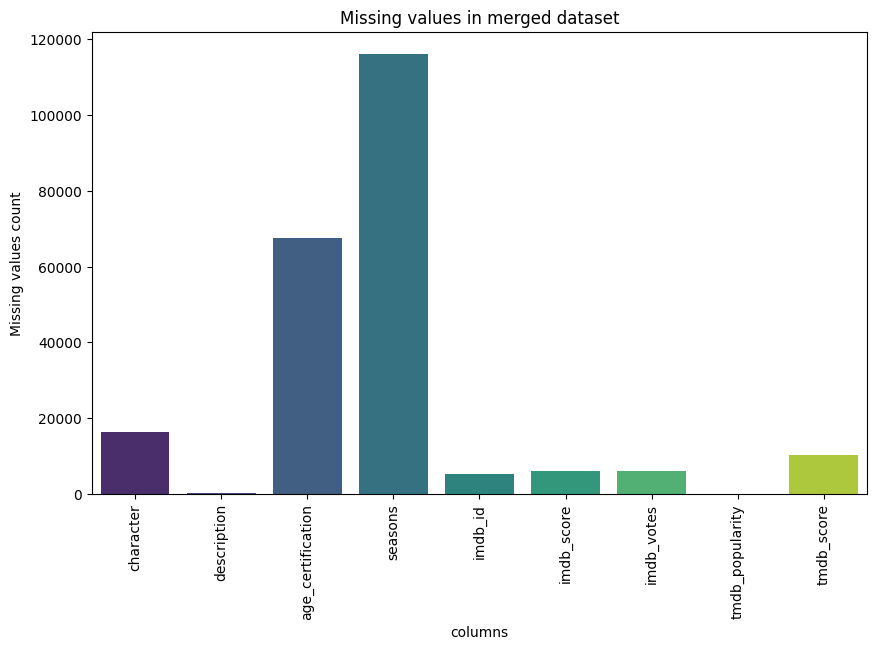

,0
character,16307
description,91
age_certification,67640
seasons,116194
imdb_id,5303
imdb_score,6051
imdb_votes,6075
tmdb_popularity,15
tmdb_score,10265


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Changed insull() to isnull()
missing_values = merged_df.isnull().sum()

missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette= 'viridis')
plt.xticks(rotation=90)
plt.xlabel('columns')
plt.ylabel('Missing values count')
plt.title('Missing values in merged dataset')
plt.show()

missing_values

**What did you know about your datset?**

After merging the titles and credits dataset hers what i got to know:

- Dataset structure:

Rows - 124235

columns - 19

- Key columns - movie/show information: id,title,type,release year,genres,runtime,description

cast & crew details: name,character,role,performance metrics,imdb score,imdb votes,tmdb scores,tmdb popularity

- Data issues duplicates:

 168 duplicates rows

- Initial observation:

movie vs shows -The dataset contains both movies and tv shows

genres distribution: titles belongs to multiple genres stored in a list format.

Popular roles: Actors and Dirctors are the most common roles.

Ratings and popularity: imdb_scores, imdb_votes,tmdb_scores help evalute performance.



#2.Understanding your variables

In [51]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124347 non-null  int64  
 1   id                    124347 non-null  object 
 2   name                  124347 non-null  object 
 3   character             108040 non-null  object 
 4   role                  124347 non-null  object 
 5   title                 124347 non-null  object 
 6   type                  124347 non-null  object 
 7   description           124256 non-null  object 
 8   release_year          124347 non-null  int64  
 9   age_certification     56707 non-null   object 
 10  runtime               124347 non-null  int64  
 11  genres                124347 non-null  object 
 12  production_countries  124347 non-null  object 
 13  seasons               8153 non-null    float64
 14  imdb_id               119044 non-null  object 
 15  

In [52]:
merged_df.describe()

,person_id,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,1.243470e+05,124347.000000,124347.000000,8153.000000,118296.000000,1.182720e+05,124332.000000,114082.000000
mean,4.062528e+05,1996.233234,95.536973,2.337790,5.967783,2.324281e+04,10.165321,5.992100
std,5.614483e+05,27.807050,30.166352,3.130184,1.241557,8.840151e+04,40.739203,1.321033
min,1.000000e+00,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,3.899600e+04,1983.000000,83.000000,1.000000,5.200000,2.870000e+02,1.875000,5.300000
50%,1.339340e+05,2009.000000,93.000000,1.000000,6.100000,1.250000e+03,3.885000,6.100000
75%,5.711600e+05,2017.000000,109.000000,2.000000,6.800000,7.067000e+03,8.795000,6.800000
max,2.371153e+06,2022.000000,540.000000,49.000000,9.900000,1.133692e+06,1437.906000,10.000000


#Variable Description


The merged dataset consists of 19 coulmns that provide information about movies and Tv shows metadata and cast/crew


1.Identification variables

column name description data type

id unique identifier for a movie or tv show string

person_id unique identifier for cast or crew member integer

2.Cast& Crew details

column name descriptiondata types

name of the cast or crew member string

name of the character played

role of the person in production

3.Movie/Show metadata

Column name description data type

name of the movie or show

type pf content

release_year year the movie or show released

4.Tv show specific variables

column name description data type

seasons number of seasons

5.Performance metrics

column name description data type

imdb_id imdb identifier for the title string

imdb_votes number of votes received

Observations&Notes

Null/missing values: columns like characters , age_certification, seasons,imdb_scores, imdb_votes,tmdb_scores have missing values

Genres and production countries: Stored as lists ,may require processing for better analysis

#Check unique values for each variables

In [55]:
unique_values = merged_df.nunique()
unique_values

,0
person_id,80508
id,8861
name,79758
character,71097
role,2
title,8748
type,2
description,8833
release_year,110
age_certification,11


#3.Data Wrangling

In [58]:
# Check the columns of the merged_df DataFrame
print(merged_df.columns)

# If 'tmdb_votes' is not in the output of the above print statement,
# remove or comment out the lines related to 'tmdb_votes'.

merged_df = merged_df.drop_duplicates()

merged_df['character'] = merged_df['character'].fillna("No description available")

merged_df['age_certification'] = merged_df['age_certification'].fillna("unrated")

merged_df['seasons'] = merged_df['seasons'].fillna("0")
merged_df['imdb_score'] = merged_df['imdb_score'].fillna(merged_df['imdb_score'].median())
merged_df['imdb_votes'] = merged_df['imdb_votes'].fillna("0")
# removed or commented out the line below if 'tmdb_votes' is not a column
# merged_df['tmdb_votes'] = merged_df['tmdb_votes'].fillna(merged_df['tmdb_votes'].median())
merged_df['tmdb_popularity'] = merged_df['tmdb_popularity'].fillna("0")


import ast

def convert_to_list(value):
  try:
     return ast.literal_eval(value)
  except:
     return []

merged_df['genres'] = merged_df['genres'].apply(convert_to_list)
merged_df['production_countries'] = merged_df['production_countries'].apply(convert_to_list)


merged_df['release_year'] = merged_df['release_year'].astype(int)
merged_df['runtime'] = merged_df['runtime'].astype(int)
merged_df['imdb_votes'] = merged_df['imdb_votes'].astype(int)
merged_df['tmdb_popularity'] = merged_df['tmdb_popularity'].astype(float)

merged_df.info(), merged_df.head()

Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'description', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 124179 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124179 non-null  int64  
 1   id                    124179 non-null  object 
 2   name                  124179 non-null  object 
 3   character             124179 non-null  object 
 4   role                  124179 non-null  object 
 5   title                 124179 non-null  object 
 6   type                  124179 non-null  object 
 7   description           124088 non-null  object 
 8   release_year          124179 non-null  int64  
 9   age_certification    

(None,
    person_id       id           name      character   role              title  \
 0      59401  ts20945     Joe Besser            Joe  ACTOR  The Three Stooges   
 1      31460  ts20945     Moe Howard            Moe  ACTOR  The Three Stooges   
 2      31461  ts20945     Larry Fine          Larry  ACTOR  The Three Stooges   
 3      21174  tm19248  Buster Keaton    Johnny Gray  ACTOR        The General   
 4      28713  tm19248    Marion Mack  Annabelle Lee  ACTOR        The General   
 
     type                                        description  release_year  \
 0   SHOW  The Three Stooges were an American vaudeville ...          1934   
 1   SHOW  The Three Stooges were an American vaudeville ...          1934   
 2   SHOW  The Three Stooges were an American vaudeville ...          1934   
 3  MOVIE  During America’s Civil War, Union spies steal ...          1926   
 4  MOVIE  During America’s Civil War, Union spies steal ...          1926   
 
   age_certification  runtime

#What all manipulations have you done and insights you found?



Removed 168 duplicates rows, reducing the dataset to 124179, handled missing values.

filled characters with "unknown" for actors.Replaced missing description with "no description available"


se age_certificate as unrated for missing values

set seasons to 0 with movies

filled imdb_scores and tmdb_score with their median values. set tmdb_ votes and tmdb_popularity with 0.

converted genres and production_countries for list format for better analysis.standardized data types.

#4.Data Visulaization, Storytelling & Experimenting with Charts : Understand the relationships with variables

**Chart - 1**

<ipython-input-59-d19ff625d60c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x="type", palette= "pastel")


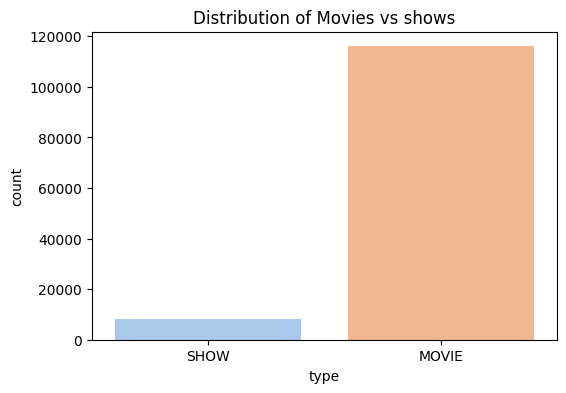

In [59]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x="type", palette= "pastel")
plt.title("Distribution of Movies vs shows")
plt.xlabel("type")
plt.ylabel("count")
plt.show()

1. Why did you pickup the specific chart?

The countplot understand whether the dataset is dominated by movies or shows

2. What is/are the insight(s) found from the chart?

Number of movies are more than the tv show

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

There is an underinvestment in tv shows which can led to loose audience who prefer tv shows

**Chart - 2**

<ipython-input-63-9c55a1a152cf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genres), y= list(counts), palette = "coolwarm")


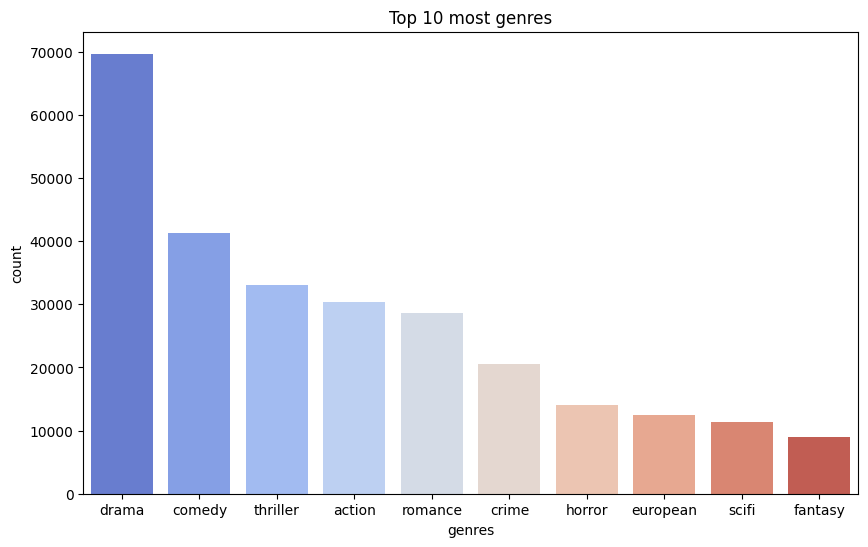

In [63]:
from collections import Counter


all_genres = [genre for sublist in merged_df['genres'] for genre in sublist]
genre_counts = Counter(all_genres).most_common(10)
genres, counts = zip(*genre_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(genres), y= list(counts), palette = "coolwarm")
plt.title("Top 10 most genres")
plt.xlabel("genres")
plt.ylabel("count")
plt.show()

1. Why did you pickup this chart?

The barplot identifies audience preference base on the most frequence genres

2. What is/are the insight(s) found from the chart?

Drama, comedy, thriller, action are the most common genres.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- This higher number of genres will attract the peopl with same preference

- Over consumption of this geners will led to limit diversity which will feel neglected the other audiences

**Chart - 3**

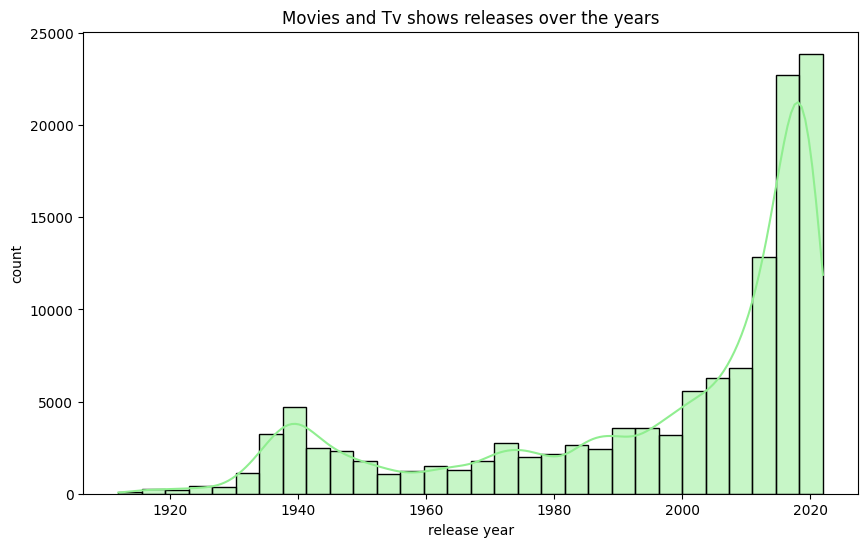

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df["release_year"], bins=30, kde=True, color= "lightgreen")
plt.title("Movies and Tv shows releases over the years")
plt.xlabel("release year")
plt.ylabel("count")
plt.show()

1. Why did you pick the specific chart?

This chart understand how production has evolved

2. What is/are the insight(s) found from the chart?

As we can see the highest number of releases occured near 2022

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifies the golden period for industry growth

**Chart - 4**

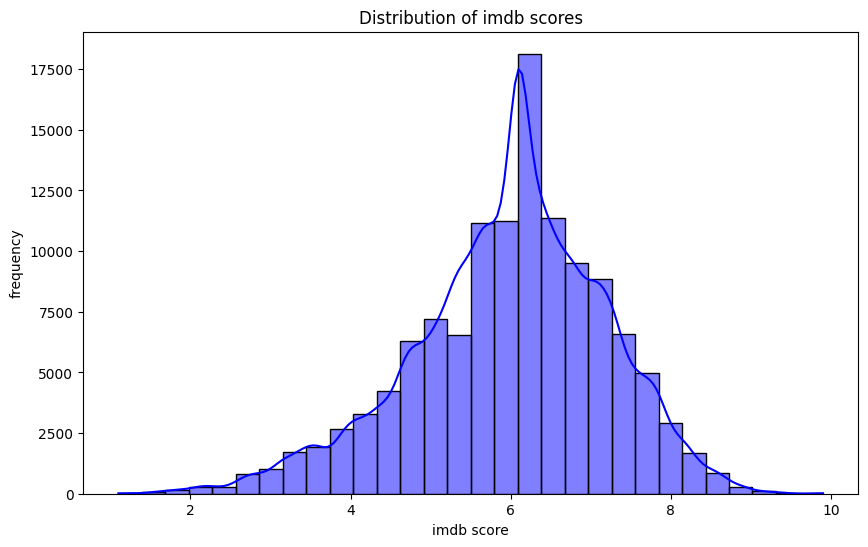

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['imdb_score'], bins=30, kde=True, color= "blue")
plt.title("Distribution of imdb scores")
plt.xlabel("imdb score")
plt.ylabel("frequency")
plt.show()

1. Why did you pick the specific chart?

It visually summarizes the spred of IMDB scores

2. What is/are the insight(s) found from the chart?

Most scores lie between 5 and 7 with peak around 6

3. Will the gained insights help creating a positive business impact?

Helps decide which genres , actor, directors tend to result in better ratings and should be prioritizes in future production

**Chart -5**

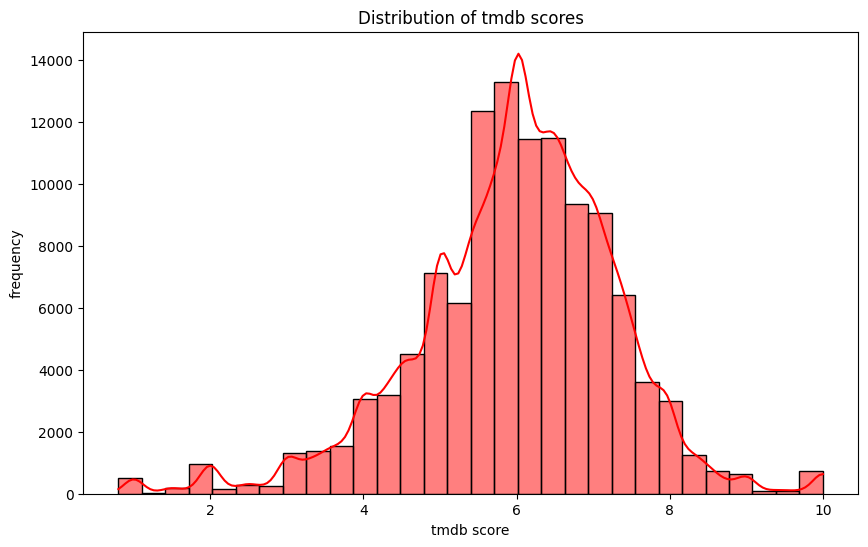

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['tmdb_score'], bins=30, kde=True, color="red") # Removed the space before "red"
plt.title("Distribution of tmdb scores")
plt.xlabel("tmdb score")
plt.ylabel("frequency")
plt.show()

1. Why did you pick the specific chart?

crucial understanding the audience perception of content quality

2.  What is/are the insight(s) found from the chart?

The highest number of shows/movies received an tmdb around 6 indicating average reception

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



Avoid recommending low rated content to new users to ensure a positive impression

**Chart - 6**

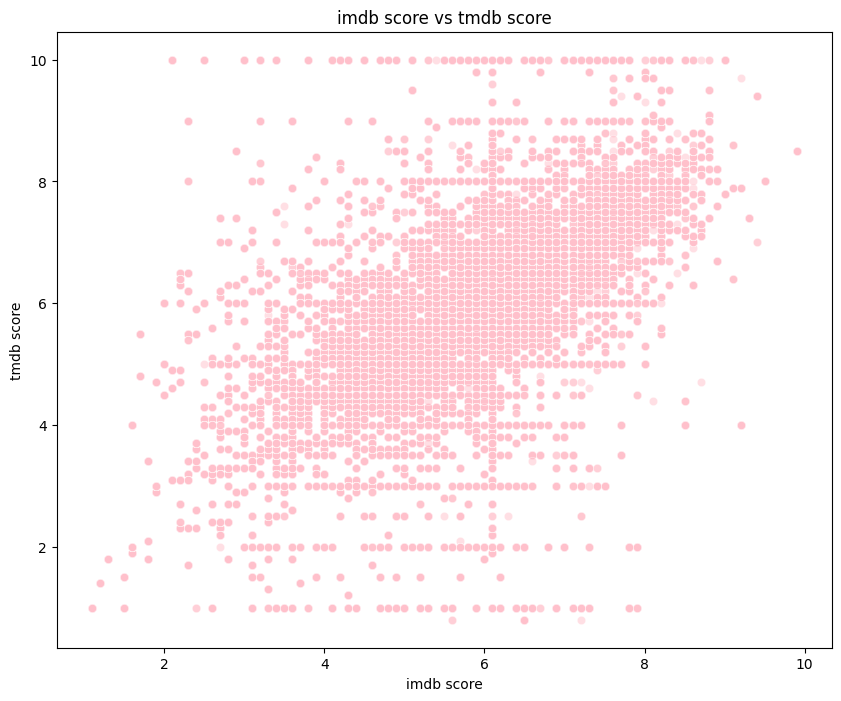

In [79]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data= merged_df, x="imdb_score", y="tmdb_score", alpha=0.5, color = "pink")
plt.title("imdb score vs tmdb score")
plt.xlabel("imdb score")
plt.ylabel("tmdb score")
plt.show()

1.  Why did you pick the specific chart?

To visually compare how ratings on IMDB relate to TMDB

2. What is/are the insight(s) found from the chart?

some content are rated much higher on TMDB than on IMDB

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



this helps in refining content strategy and improving viwer trust

**Chart - 7**

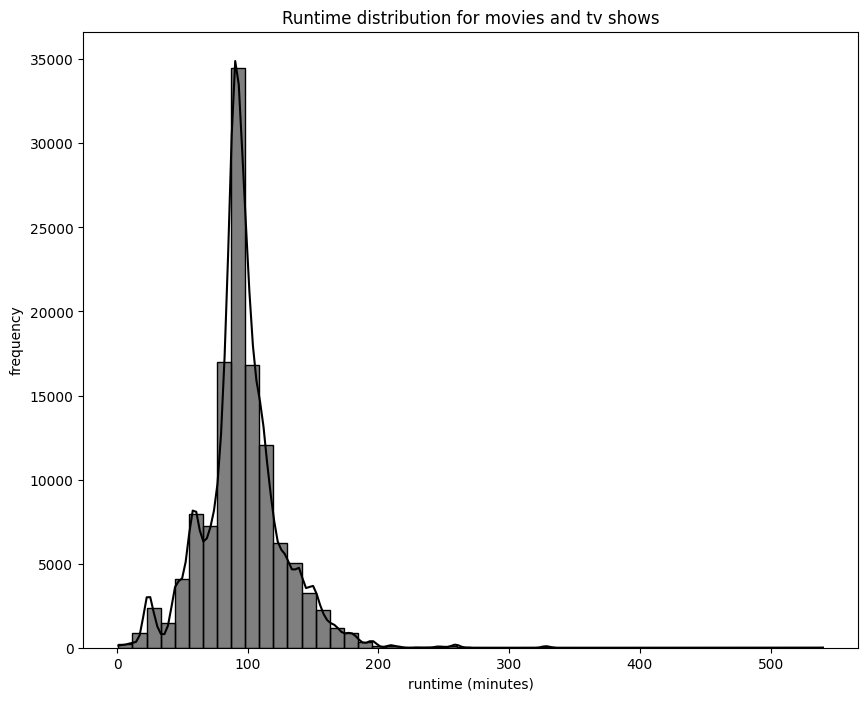

In [82]:
plt.figure(figsize=(10, 8))
sns.histplot(merged_df['runtime'], bins=50, kde=True, color= "black")
plt.title("Runtime distribution for movies and tv shows")
plt.xlabel("runtime (minutes)")
plt.ylabel("frequency")
plt.show()

1. Why did you pick the specific chart?

It helps understand common runtime lengths,outliers and audience consuption trends

2. What is/are the insight(s) found from the chart?

The highest frquency occurs around 90-100 minutes which is the typical length of feature films

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps personalize recommendations base on user watch time prefrences

**Chart- 8 Correlation Heatmap**

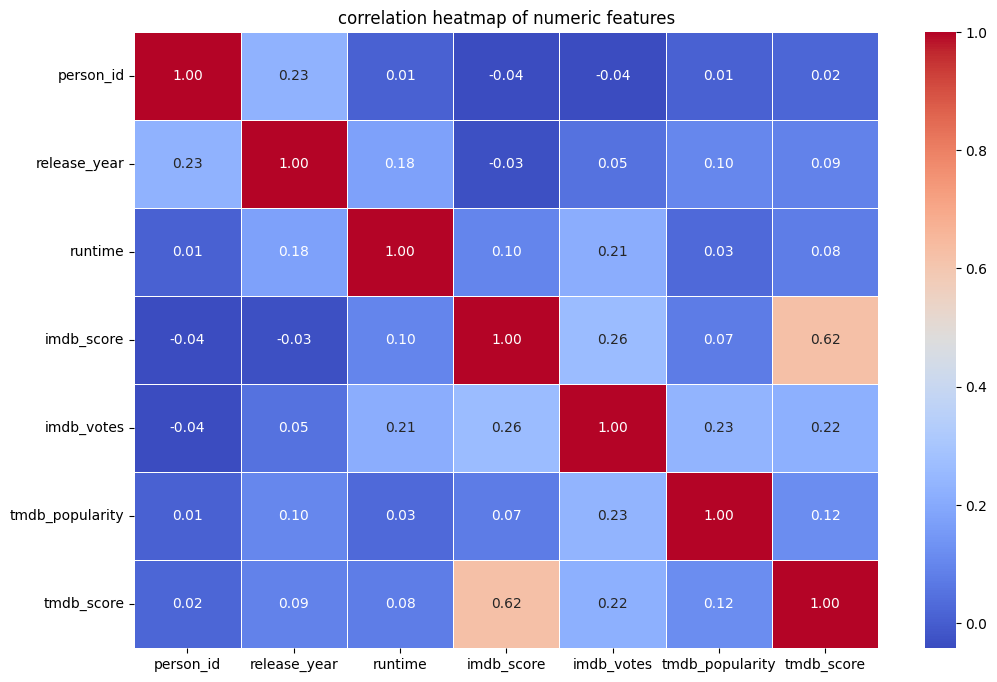

In [89]:
plt.figure(figsize=(12, 8))
corr_matrix = merged_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot= True, cmap="coolwarm", linewidth=0.5, fmt=".2f")

plt.title("correlation heatmap of numeric features")
plt.show()
plt.show()

1. Why did you pick the specific chart?

A correlation heatmap is visually shows how strongly related different numeric variables are.

It helps to identify which feature are assosciated with each other which can guide:

- Content strategeies for Amazon prime

- Performace analytics of shows/movies

2. What is/are the insight(s) found from the chart?

- imdb_score and tmdb_score have a positive correlation of 0.62, this suggests both platform rate content similarly, indicating consistency in quality judgment

- imdb_votes and imdb_score 0.26, higher rated content tends to attract more votes

**Chart- 9 Pair Plot**

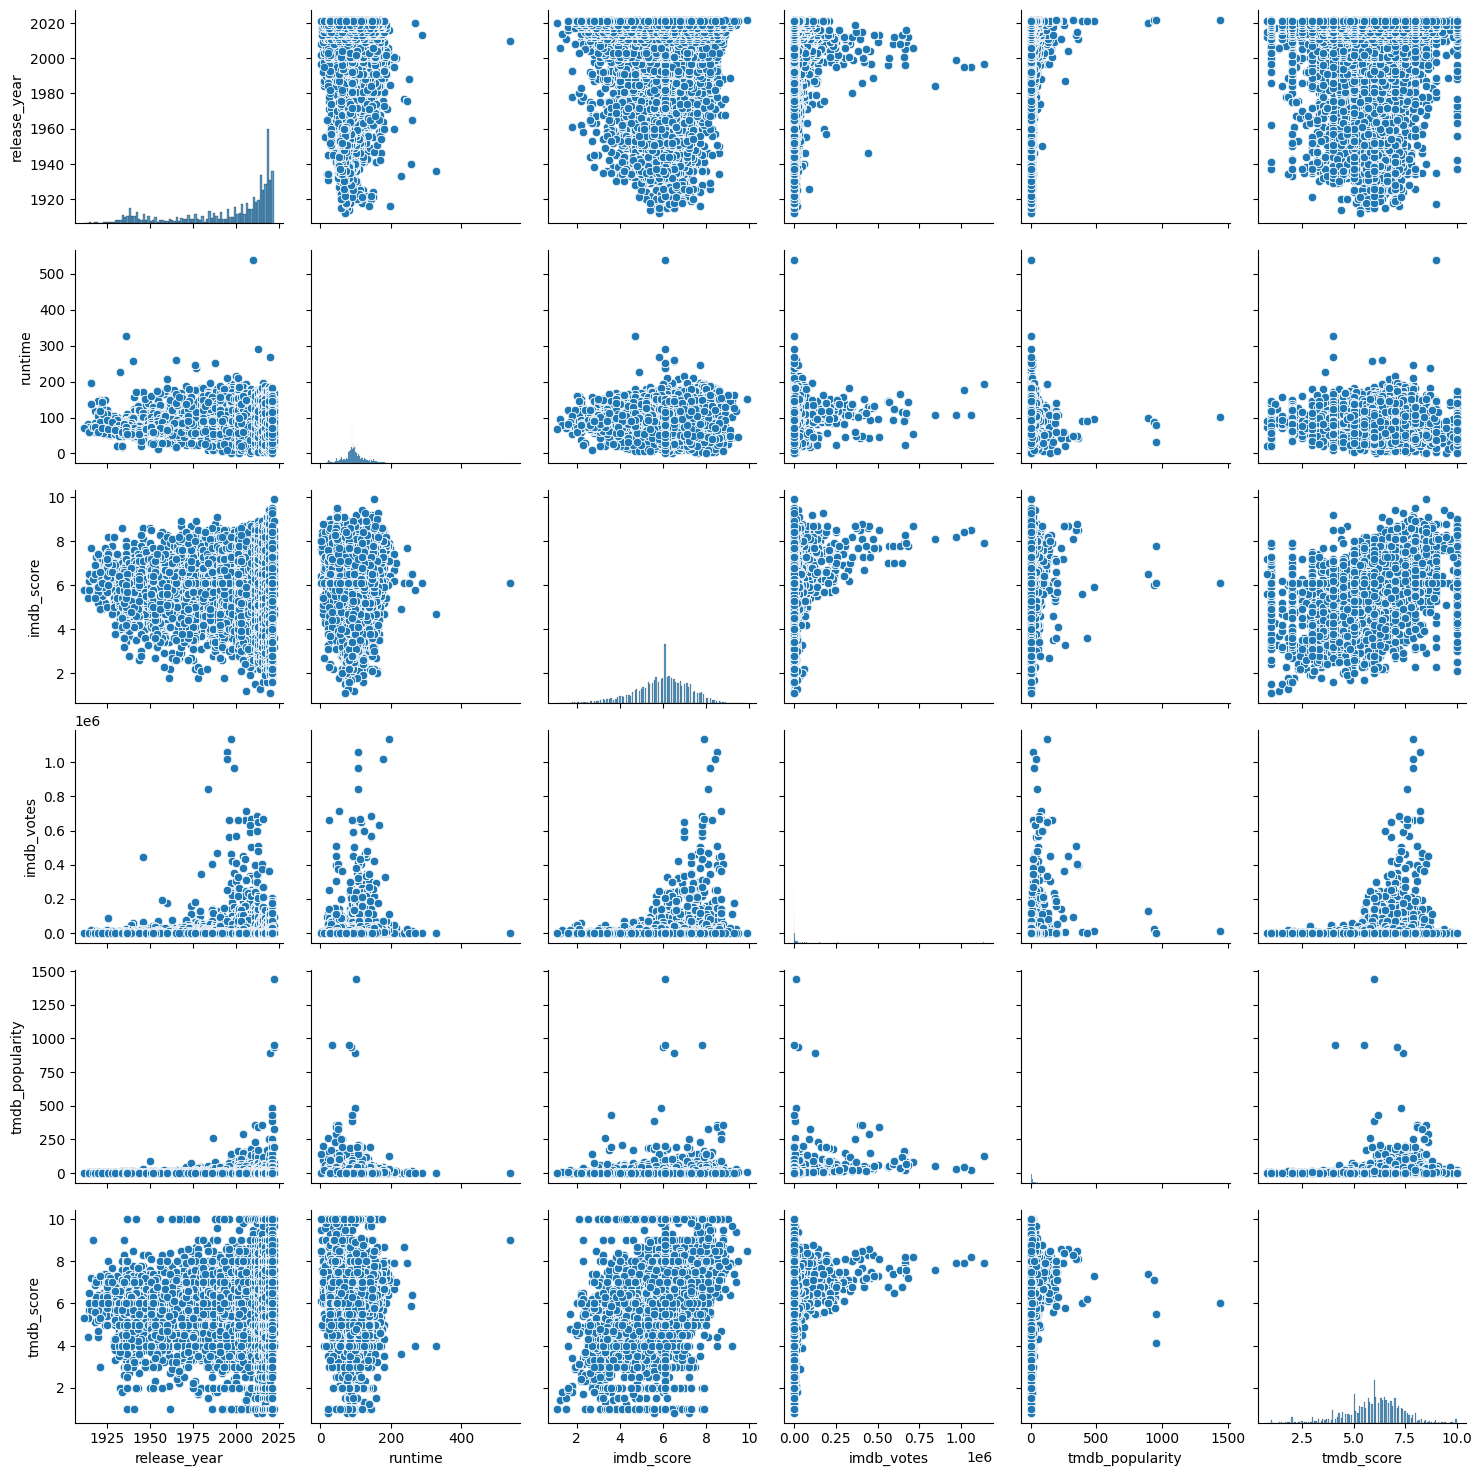

In [91]:
numeric_columns = ["release_year", "runtime", "imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]
sns.pairplot(merged_df[numeric_columns])
plt.show()

1. Why did you pick the specific chart?

A pairplot provides scatter plots between every pair of features:

Helps you in:

- Detect linear or nonlinear relationships

- visually confirm correalation shown in the heatmap



2. What is/are the insight(s) found from the chart?

- Most runtime are clustered between 60 to 120 minutes

- slight positive spread: longer content gets more votes.

- Highlights popularity gaps between different shows/movies.

- Shows and movies rated highly on IMDB are often rated highly on TMDB too

#5.Solution to Business Objective

Base on the analysis performed,heres a solution to the businedd objectives outlined in the project.

1.Determine the distribution between movies and TV shows to understand content prioritization.

The analysis showed that the dataset contains more movies than TV shows. This indicates that Amazon Prime currently prioritizes movies in its content library.

- Business Impact: This insight suggests that if Amazon Prime wants to appeal to a wider audience, particularly those who prefer long-form series, they might consider increasing their investment in TV show production or acquisition.


2.Identify the most common genres and how they align with viewer preferences.

The EDA identified Drama, Comedy, Thriller, and Action as the most frequent genres in the dataset. While a direct measure of viewer preference isn't available in this dataset, the prevalence of these genres suggests they are either popular with viewers or are historically significant in content production.

- Business Impact: Amazon Prime can use this information to:
 - Positive: Focus on acquiring and producing content in these popular genres to cater to existing audience preferences.
 - Negative: Over-reliance on these genres might lead to a lack of diversity, potentially alienating viewers with different tastes. To mitigate this, they could explore popular sub-genres within these categories or strategically invest in less common genres to attract niche audiences.

3.Provide insights into runtime, seasons, and other structural aspects of the content.

The analysis of runtime distribution showed that the highest frequency of content is around 90-100 minutes, which aligns with typical feature film lengths. The 'seasons' variable was filled with '0' for movies during data wrangling, indicating that the number of seasons is primarily relevant for TV shows.

- Business Impact:
 - Positive: Understanding typical runtimes can inform content scheduling and user interface design. For example, grouping content by runtime could help users find something suitable for the time they have available.
 - Positive: The difference in how 'seasons' applies to movies and shows is a clear structural distinction. This reinforces the need to consider content type when analyzing other metrics like viewership or completion rates.
 - Positive: For TV shows, analyzing the distribution of the number of seasons could inform decisions about renewing series or acquiring shows with a certain number of seasons that tend to perform well.


Overall Solution:

The EDA provides a solid foundation for Amazon Prime to make data-driven decisions about its content strategy. By understanding the current content mix, popular genres, and structural characteristics, they can:

- Optimize content acquisition and production to better align with audience preferences.
- Identify potential areas for growth, such as increasing investment in TV shows or exploring a wider range of genres.
- Improve the user experience by leveraging insights into content structure and characteristics.

#Conclusion

This Exploratory Data Analysis (EDA) of Amazon Prime Video content, leveraging the merged titles and credits datasets, has provided valuable insights into the platform's content landscape. By examining the distribution of content types, identifying prevalent genres, and analyzing performance metrics like IMDB and TMDB scores, we have gained a deeper understanding of the current content strategy and potential areas for optimization.

The analysis revealed that the dataset is dominated by movies, suggesting a potential area for growth in the TV show category to cater to a broader audience. Popular genres such as Drama, Comedy, Thriller, and Action are well-represented, aligning with general audience preferences, but also highlighting the need for strategic investment in other genres to ensure content diversity and appeal to niche markets.

The correlation analysis indicated a positive relationship between IMDB and TMDB scores, suggesting a degree of consistency in content quality assessment across platforms. Furthermore, the runtime distribution provided insights into typical content lengths, which can inform content scheduling and user interface design for enhanced user experience.

In conclusion, this EDA serves as a foundational step for Amazon Prime Video to make data-driven decisions. The insights gathered can be used to refine content acquisition and production strategies, identify opportunities for expanding the content library, and ultimately enhance viewer engagement and satisfaction.

#Hurrah! You have successfully completed your EDA Capstone Project !!!